True

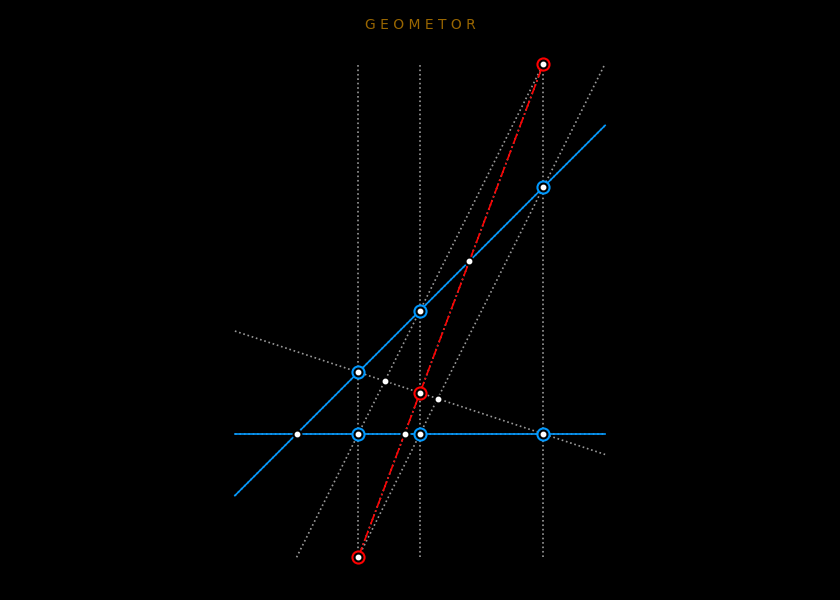

In [8]:
%run run.py
%matplotlib widget

limx, limy = (-2, 4), (-2, 6)
bounds = set_bounds(limx, limy)

plt_init()

A1 = point(0, 0)
add_point(A1)
A2 = point(1, 0)
add_point(A2)
A3 = point(3, 0)
add_point(A3)

line_a = line(A1, A2)
add_element(line_a)

B1 = point(0, 1)
add_point(B1)
B2 = point(1, 2)
add_point(B2)
B3 = point(3, 4)
add_point(B3)

line_b = line(B1, B2)
add_element(line_b)

add_element(line(A2, B2))
add_element(line(A2, B3))

add_element(line(A3, B1))
add_element(line(A3, B3))

add_element(line(A1, B1))
add_element(line(A1, B2))

# pappus_line = line(pts[7], pts[13])
pappus_line = line(pts[9], pts[11])
add_element(pappus_line)

plot_elements(elements, bounds)
plot_line(line_a, bounds, color='#09F', linestyle='-')
plot_line(line_b, bounds, color='#09F', linestyle='-')
plot_line(pappus_line, bounds, color='r', linestyle='-.')

plot_points([A1, A2, A3], under_color='#09F', under_markersize=15, add_to_cursors=False)
plot_points([B1, B2, B3], under_color='#09F', under_markersize=15, add_to_cursors=False)
plot_points([pts[7], pts[9], pts[11]], under_color='r', under_markersize=15, add_to_cursors=False)
plot_points(pts)

sp.Point.is_collinear(pts[7], pts[9], pts[11])

In [2]:
line_b.equation().as_expr().subs(x, 5)

In [3]:
eq1 = sp.Eq(line_b.equation().expand(), 0)
# eq1 = sp.Expr(line_b.equation())
eq1
eq1.subs(x, 5)

In [4]:
# eq2 = sp.Eq(-x + y - 1, 0)
eq1 = x - 2
eq2 = -x + y - 1
# eq2 = line_b.equation()
eq2.subs(x, 5)
# sp.solve([eq1, eq2])

In [5]:
l1 = line(A1, A2)
l1.equation()

In [6]:
sp.solve([eq1, eq2], y)

In [7]:
sp.solve(line_b.equation(), eq)

NameError: name 'eq' is not defined

In [ ]:
line_b.intersection(sp.Line(sp.Eq(x + 0 * y - 5)))

In [ ]:
sp.Eq(x, 5)